# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


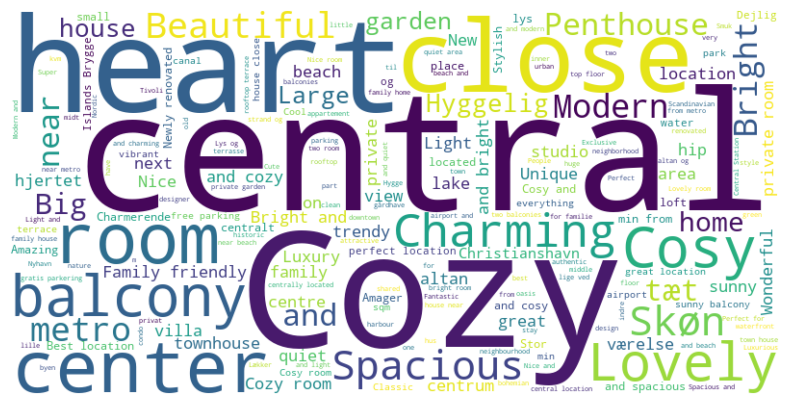

In [157]:
# pip install pandas
# pip install scikit-learn
# pip install wordcloud
import pandas as pd
import sklearn as sk

# load the data
dataCorrelation_limited_encoded = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = dataCorrelation_limited_encoded[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan
data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

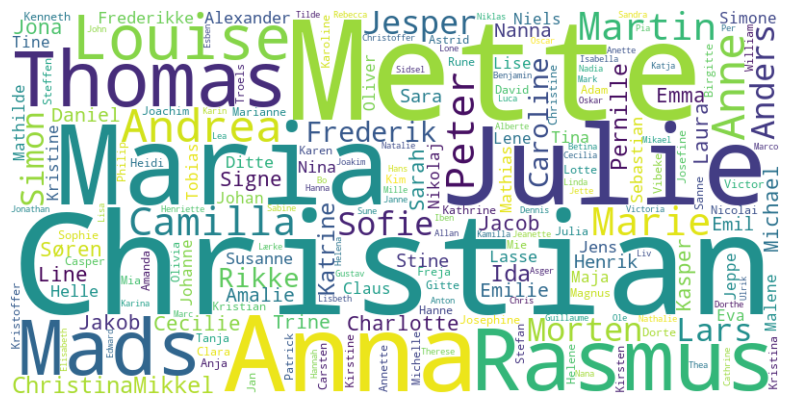

Total rows in host_names: 13815
Total rows in filtered_host_names: 11515
      host_name  count
0     Christian    145
1         Mette    144
2         Maria    125
3         Julie    120
4          Anna    113
...         ...    ...
2165     Matija      1
2166      Fatim      1
2167    Tiffany      1
2168     Martua      1
2169      Rakul      1

[2170 rows x 2 columns]


In [158]:
# State your solution here. Add more cells if needed.
host_names=data[["host_id", "host_name","host_about","host_is_superhost","host_location"]]
filtered_host_names = host_names[
    (~host_names['host_name'].str.contains("@|-|Forenom Denmark|Sanders|ApartmentinCopenhagen|Blueground|Generator|Casa|BlydeHomes", case=False, na=False)) &
    (host_names['host_name'].str.match(r'^[a-zA-ZæøåÆØÅ]+$', na=False)) &
    (host_names['host_name'].str.len() > 1) &  # Eliminate one-character names
    (~host_names['host_name'].str.match(r'(.)\1+$', na=False))  # Eliminate names with repeating characters
]

text = ' '.join(filtered_host_names['host_name'].astype(str))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Using len() to count rows
total_host_names = len(host_names)
total_filtered_host_names = len(filtered_host_names)

print(f"Total rows in host_names: {total_host_names}")
print(f"Total rows in filtered_host_names: {total_filtered_host_names}")
# Get the count of each unique 'host_name' in the filtered DataFrame
name_counts = filtered_host_names['host_name'].value_counts().reset_index()

# Rename the columns for clarity
name_counts.columns = ['host_name', 'count']
# pd.set_option('display.max_rows', None)

# Display the result
print(name_counts)
#Yes, because all of our top names were on the list of popular names.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [159]:
# State your solution here. Add more cells if needed.
#pip install folium in your terminal
import folium
data_map = data_filtered[["id",
    "host_id"  ,
    "price"  ,
    "latitude"  ,
    "longitude",  ]]

display(data_map.head())

m=folium.Map(location=[55.67,12.56],zoom_start=14, tiles="OpenStreetMap")

def price_color(price):
    if price < 200:
        return 'green'
    elif 200 <= price < 500:
        return 'blue'
    elif 500 <= price < 800:
        return 'orange'
    else:
        return 'red'

# Limit the data to the top 100 rows
top_100_data = data_map.head(100)

# Add markers for each listing in the top 100 rows
for index, row in top_100_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],  # Latitude and longitude
        popup=f"Price: ${row['price']}",  # Show price in pop-up
        icon=folium.Icon(color=price_color(row['price']))  # Color marker based on price range
    ).add_to(m)

    legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 150px; height: 160px; 
            background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
            ">&nbsp; <b>Price Range Legend</b> <br>
            &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i> Under $200<br>
            &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i> $200 - $499<br>
            &nbsp; <i class="fa fa-map-marker fa-2x" style="color:orange"></i> $500 - $799<br>
            &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i> $800 and above
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

m

,id,host_id,price,latitude,longitude
0,6983,16774,898.0,55.686410,12.547410
1,26057,109777,2600.0,55.693070,12.576490
2,26473,112210,3250.0,55.676020,12.575400
3,29118,125230,725.0,55.670230,12.555040
4,31094,129976,1954.0,55.666602,12.555283


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

      neighbourhood_cleansed   price
0                   Nørrebro   898.0
1                   Indre By  2600.0
2                   Indre By  3250.0
3  Vesterbro-Kongens Enghave   725.0
4  Vesterbro-Kongens Enghave  1954.0
float64
     neighbourhood_cleansed   price
2855               Indre By  4000.0
1491               Indre By  4000.0
8694          Frederiksberg  4000.0
3751               Indre By  4000.0
464                Indre By  4000.0
difference 112 


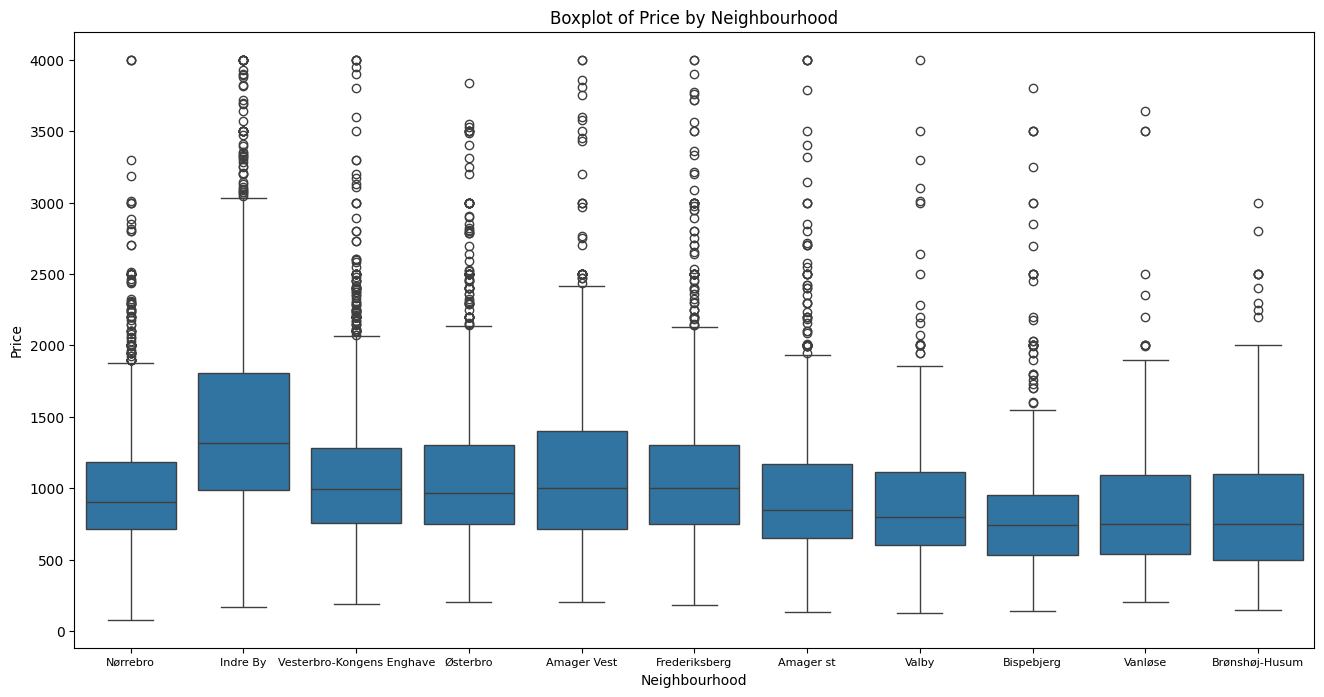

      neighbourhood_cleansed  accommodates
0                    Nrrebro             2
1                   Indre By             6
2                   Indre By            11
3  Vesterbro-Kongens Enghave             2
4  Vesterbro-Kongens Enghave             6
int64


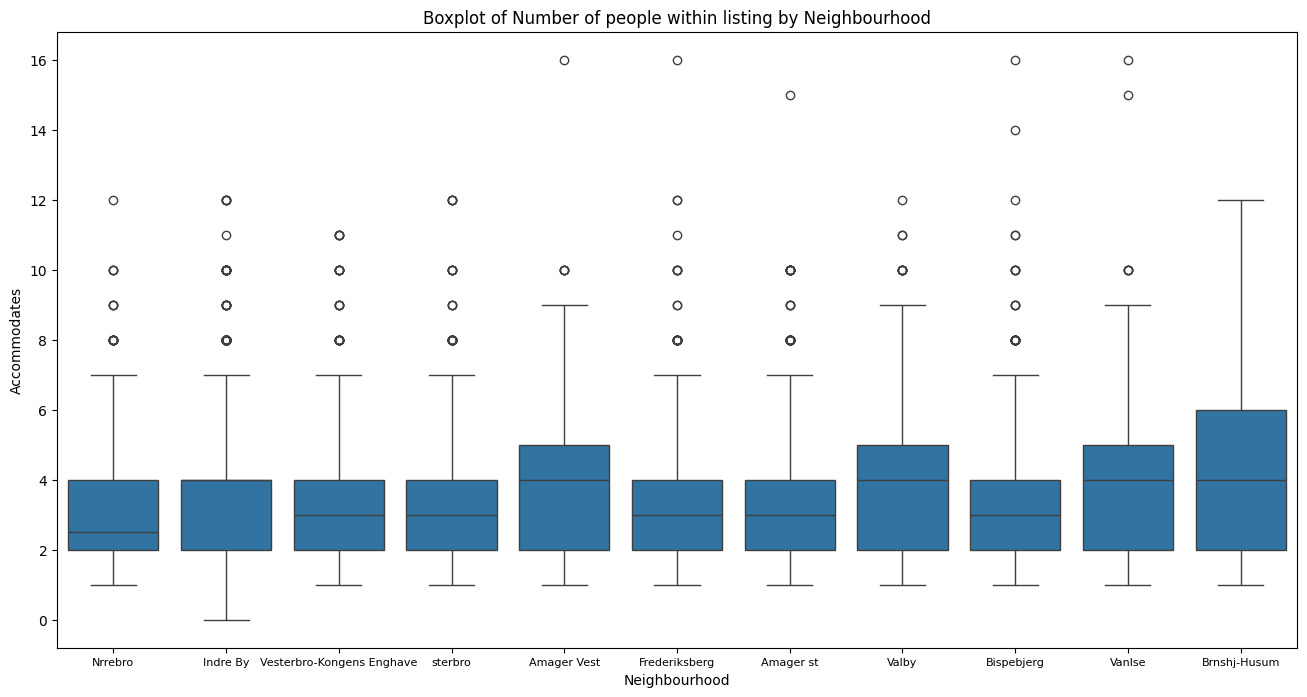

      neighbourhood_cleansed  review_scores_rating
0                    Nrrebro                  4.78
1                   Indre By                  4.91
2                   Indre By                  4.53
3  Vesterbro-Kongens Enghave                  4.92
4  Vesterbro-Kongens Enghave                  4.88
float64


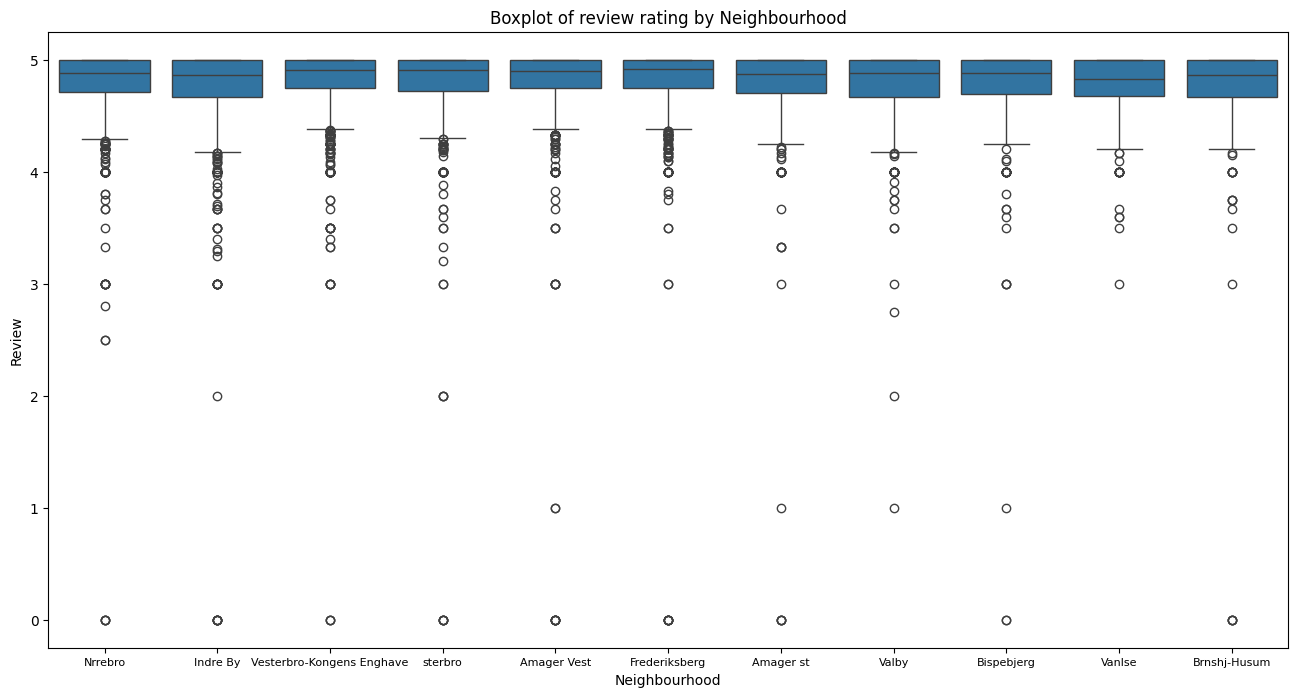

In [164]:
import seaborn as sns

neighbourhood_data = data_filtered[['neighbourhood_cleansed', 'price']]
print(neighbourhood_data.head())
print(neighbourhood_data['price'].dtype)

# Lets remove the prices that are too high because they are outliers
price_threshold = 4000
filtered_neighbourhood_data = neighbourhood_data[neighbourhood_data['price'] <= price_threshold]
sorted_data = filtered_neighbourhood_data.sort_values(by='price', ascending=False)
print(sorted_data.head())

total_neig = len(neighbourhood_data)
total_neig_fil = len(filtered_neighbourhood_data)

print(f'difference {total_neig-total_neig_fil} ')

plt.figure(figsize=(16, 8))  # Increase the figure size
plt.xticks(fontsize=8)  # Set the font size for x-axis labels
sns.boxplot(x='neighbourhood_cleansed', y='price', data=filtered_neighbourhood_data)
plt.title('Boxplot of Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

# With the boxplot we know the median value of each neighbourhood price and which listings are outliers. The most expensive one is Indre By, there are a lot of outliers and the lest expensive one Pisbedjerg

neighbourhood_data_2 = data[['neighbourhood_cleansed', 'accommodates']]
print(neighbourhood_data_2.head())
print(neighbourhood_data_2['accommodates'].dtype)

plt.figure(figsize=(16, 8))  # Increase the figure size
plt.xticks(fontsize=8)  # Set the font size for x-axis labels
sns.boxplot(x='neighbourhood_cleansed', y='accommodates', data=neighbourhood_data_2)
plt.title('Boxplot of Number of people within listing by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Accommodates')
plt.show()


neighbourhood_data_3 = data[['neighbourhood_cleansed', 'review_scores_rating']]
print(neighbourhood_data_3.head())
print(neighbourhood_data_3['review_scores_rating'].dtype)

plt.figure(figsize=(16, 8))  # Increase the figure size
plt.xticks(fontsize=8)  # Set the font size for x-axis labels
sns.boxplot(x='neighbourhood_cleansed', y='review_scores_rating', data=neighbourhood_data_3)
plt.title('Boxplot of review rating by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Review')
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [161]:
# State your solution here. Add more cells if needed.

import pandas as pd

# Load data
dataCorrelation_limited_encoded = pd.read_csv('listings.csv')

# Filter relevant columns
data_limited = dataCorrelation_limited_encoded[["id",
    "neighbourhood_cleansed", 
    "room_type", 
    "price",
    "review_scores_rating",
    "number_of_reviews",
    "minimum_nights"]]

# Remove rows with no reviews and drop NaNs
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0].dropna()

# Clean and convert price
data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

# Correct the names of neighborhoods
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")

# Get a list of distinct neighborhoods after correction
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Group by neighborhood and analyze room_type and price
grouped = data_filtered.groupby('neighbourhood_cleansed')


# Chosen features:
# 1. Price Analysis: 
# The table gives insights into the spread of prices across neighborhoods,  including the range (Min/Max), standard deviation, and quartiles, 
# which can help identify which neighborhoods are expensive and which are more affordable.

# 2. Room Type Distribution: 
# The room type breakdown reveals what kind of accommodations (e.g., "Entire home/apt", "Private room")  are more common in certain neighborhoods.

# Aggregate using descriptive statistics for 'price' for each neighborhood (excluding mode)
price_stats = grouped['price'].agg(['mean', 'median', 'std', 'var', 'min', 'max']).round(2)

review_scores_mean = grouped['review_scores_rating'].agg(['mean']).rename(columns={'mean': 'Rating Mean'}).round(2)

# Quartiles for price
price_quartiles = grouped['price'].quantile([0.25, 0.5, 0.75]).unstack()

# Calculate the mode for price separately (since it needs special handling)
mode_stats = grouped['price'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Combine the price stats with quartiles and mode
price_stats_combined = pd.concat([price_stats, price_quartiles, mode_stats.rename('Mode')], axis=1)
price_stats_combined.columns = ['Price Mean', 'Price Median', 'Price Standard Deviance', 'Price Variance', 'Min Price', 'Max Price', 'Price 25th Percentile', 'Price 50th Percentile', 'Price 75th Percentile', ' Price Mode']

# Room type distribution by neighborhood
room_type_counts = grouped['room_type'].value_counts().unstack().fillna(0)
# value_counts gets the occurence of each unique value

# Combine the room type counts and price stats
neighborhood_analysis = pd.concat([price_stats_combined, review_scores_mean, room_type_counts], axis=1)

# Display the final analysis
display(neighborhood_analysis)


,Price Mean,Price Median,Price Standard Deviance,Price Variance,Min Price,Max Price,Price 25th Percentile,Price 50th Percentile,Price 75th Percentile,Price Mode,Rating Mean,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,,,,,,,,,,,,
Amager Vest,1204.64,1000.0,2114.91,4472858.79,200.0,64900.0,725.00,1000.0,1400.00,1000.0,4.78,915.0,0.0,149.0,2.0
Amager st,1018.94,851.0,703.78,495311.08,135.0,10000.0,650.00,851.0,1190.00,1000.0,4.78,793.0,3.0,131.0,1.0
Bispebjerg,910.77,746.0,1827.51,3339776.70,143.0,44000.0,536.50,746.0,962.00,700.0,4.77,510.0,0.0,96.0,1.0
Brønshøj-Husum,869.42,750.0,550.71,303276.80,145.0,4462.0,498.00,750.0,1100.00,500.0,4.71,217.0,0.0,70.0,2.0
Frederiksberg,1215.58,1000.0,1862.06,3467273.28,185.0,58000.0,750.00,1000.0,1339.00,1000.0,4.80,1050.0,0.0,133.0,0.0
Indre By,1575.59,1350.0,1084.19,1175465.91,165.0,20000.0,995.00,1350.0,1876.50,1200.0,4.75,1707.0,10.0,130.0,4.0
Nørrebro,1014.50,900.0,608.90,370755.29,79.0,12500.0,720.00,900.0,1198.00,1000.0,4.80,1892.0,0.0,166.0,3.0
Valby,932.14,800.0,622.84,387925.00,127.0,7429.0,600.00,800.0,1119.50,700.0,4.77,450.0,0.0,89.0,0.0
Vanløse,874.54,750.5,502.56,252567.58,200.0,3643.0,536.75,750.5,1091.75,1200.0,4.77,254.0,0.0,44.0,0.0


### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

C:\Users\Ginta Bilinska\AppData\Local\Temp\ipykernel_33116\3432164701.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCorrelation_limited['price'] = dataCorrelation_limited['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Ginta Bilinska\AppData\Local\Temp\ipykernel_33116\3432164701.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCorrelation_limited["host_has_profile_pic"] = dataCorrelation_limited["host_has_profile_pic"].replace({'f': 0, 't': 1},regex=True).astype(float)
C:

Mapping for neighbourhood (based on average price): {'Copenhagen, 2500, Denmark': 0, 'Brønshøj, København, Capital Region of Denmark, Denmark': 1, '2000 Frederiksberg, Denmark': 2, 'København V, Dk, Denmark': 3, 'Copenhagen, Nv, Denmark': 4, 'Kobenhavn V, Capital Region of Denmark, Denmark': 5, 'Copenhagen, Copenhagen S, Denmark': 6, 'København V, København , Denmark': 7, 'Copenhagen, Teglholmen, Denmark': 8, 'Gentofte, Danmark, Denmark': 9, 'Copenhagen East, Denmark': 10, 'Frederiksberg-C, Denmark': 11, 'Søborg, Danmark, Denmark': 12, 'Copenhagen, 2200, Denmark': 13, 'København n, Denmark': 14, 'København V, Capital Region of Denmark, Denmark': 15, 'Copenhagen, Valby, Denmark': 16, 'Copenhagen , Capital Region of Denmark, Denmark': 17, 'Kastrup, Cph, Denmark': 18, 'Copenhagen,  Østerbro, Denmark': 19, 'Frederiksberg, Frb, Denmark': 20, 'Copenhagen, Amager, Denmark': 21, 'Copenhagen, Marche, Denmark': 22, 'København sv, Denmark': 23, 'København NV, Sealand, Denmark': 24, 'Charlottenlun

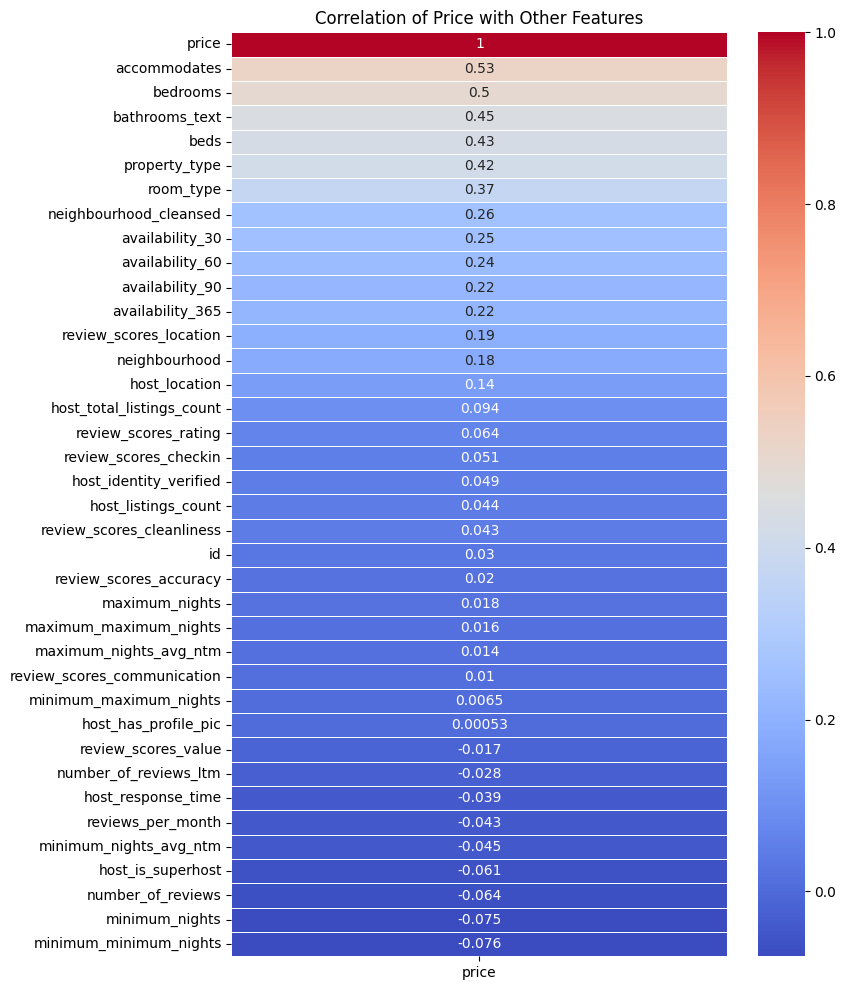

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataCorrelation = pd.read_csv('listings.csv')
dataCorrelation_limited = dataCorrelation[["id",
    "price",                                      
    "host_listings_count", 
    "host_total_listings_count", 
    "accommodates", 
    "bedrooms", 
    "beds", 
    "minimum_nights",
    "maximum_nights", 
    "minimum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights", 
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "number_of_reviews",
    "number_of_reviews_ltm",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month",
    "neighbourhood",
    "property_type",
    "host_location",
    "room_type",
    "neighbourhood_cleansed",
    "host_response_time",
    "bathrooms_text",
    "host_has_profile_pic",
    "host_identity_verified",
    "host_is_superhost"]]

dataCorrelation_limited['price'] = dataCorrelation_limited['price'].replace('[\$,]', '', regex=True).astype(float)
dataCorrelation_limited["host_has_profile_pic"] = dataCorrelation_limited["host_has_profile_pic"].replace({'f': 0, 't': 1},regex=True).astype(float)
dataCorrelation_limited["host_identity_verified"] = dataCorrelation_limited["host_identity_verified"].replace({'f': 0, 't': 1},regex=True).astype(float)
dataCorrelation_limited["host_is_superhost"] = dataCorrelation_limited["host_is_superhost"].replace({'f': 0, 't': 1},regex=True).astype(float)

dataCorrelation_limited["neighbourhood_cleansed"] = dataCorrelation_limited["neighbourhood_cleansed"].replace({
    "Nrrebro": "Nørrebro", "sterbro": "Østerbro", "Vanlse": "Vanløse", "Brnshj-Husum": "Brønshøj-Husum"})

def encode_string_columns(df, columns, target_column='price'):
    """Encodes string columns by sorting categories by their average price."""
    for col in columns:
        avg_price_per_category = df.groupby(col)[target_column].mean().sort_values()
        mapping = {category: idx for idx, category in enumerate(avg_price_per_category.index)}
        df[col] = df[col].map(mapping)
        print(f"Mapping for {col} (based on average {target_column}): {mapping}")
        
    return df

# List of string columns we want to encode
string_columns = ['neighbourhood','property_type','host_location', 'room_type', 'neighbourhood_cleansed','host_response_time','bathrooms_text']
dataCorrelation_limited_encoded = encode_string_columns(dataCorrelation_limited, string_columns)
dataCorrelation_limited_encoded = dataCorrelation_limited_encoded.dropna()

# Filter out prices higher than 4000
price_threshold = 4000
dataCorrelation_limited_encoded = dataCorrelation_limited_encoded[dataCorrelation_limited_encoded['price'] <= price_threshold]

correlation_matrix = dataCorrelation_limited_encoded.corr()
# Extract only the correlation of 'price' with other columns
price_correlation = correlation_matrix[['price']].sort_values(by='price', ascending=False)

# Visualize the heatmap for price correlation with other features
plt.figure(figsize=(8, 12))  # Adjust size for better readability
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

plt.title('Correlation of Price with Other Features')
plt.show()

In [163]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Filter relevant columns
data_limited = dataCorrelation_limited_encoded[[  # Make sure this DataFrame is defined
    "neighbourhood_cleansed",
    "accommodates",
    "room_type",
    "price",
    "bathrooms_text",
    "bedrooms",
    "beds",
    "review_scores_rating",
    "review_scores_location",
    "property_type",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
]]

# Correct neighbourhood names
data_limited["neighbourhood_cleansed"] = data_limited["neighbourhood_cleansed"].replace({
    "Nrrebro": "Nørrebro", "sterbro": "Østerbro", "Vanlse": "Vanløse", "Brnshj-Husum": "Brønshøj-Husum"
})

# Remove dollar signs and commas from the 'price' column and convert to float
data_limited['price'] = data_limited['price'].replace('[\$,]', '', regex=True).astype(float)

# Filter out prices higher than 4000 (outliers)
price_threshold = 4000
data_limited = data_limited[data_limited['price'] <= price_threshold]

# One-Hot Encoding for categorical variables 
data_encoded = pd.get_dummies(data_limited, columns=['room_type', 'neighbourhood_cleansed'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('price', axis=1)
y = data_encoded['price'].to_numpy() 

# Create some interaction terms
X['accommodates_beds'] = X['accommodates'] * X['bedrooms'] * X['beds']
X['available_reviews'] = X['availability_30'] * X['review_scores_rating']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Function to print performance metrics (train / test)
def print_metrics(model_name, train_pred, test_pred, y_train, y_test):
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"\n{model_name} Performance (Train / Test):")
    print(f"Mean Absolute Error: {train_mae:.2f} / {test_mae:.2f}")
    print(f"Mean Squared Error: {train_mse:.2f} / {test_mse:.2f}")
    print(f"R-squared: {train_r2:.2f} / {test_r2:.2f}")

# OLS (Linear Regression)
ols = LinearRegression()
ols.fit(x_train_scaled, y_train)

ols_train_pred = ols.predict(x_train_scaled)
ols_test_pred = ols.predict(x_test_scaled)

print_metrics("OLS (Linear Regression)", ols_train_pred, ols_test_pred, y_train, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

lasso_train_pred = lasso.predict(x_train_scaled)
lasso_test_pred = lasso.predict(x_test_scaled)

print_metrics("Lasso Regression", lasso_train_pred, lasso_test_pred, y_train, y_test)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_scaled, y_train)

ridge_train_pred = ridge.predict(x_train_scaled)
ridge_test_pred = ridge.predict(x_test_scaled)

print_metrics("Ridge Regression", ridge_train_pred, ridge_test_pred, y_train, y_test)



OLS (Linear Regression) Performance (Train / Test):
Mean Absolute Error: 290.31 / 291.77
Mean Squared Error: 171285.25 / 163708.05
R-squared: 0.54 / 0.54

Lasso Regression Performance (Train / Test):
Mean Absolute Error: 290.27 / 291.61
Mean Squared Error: 171309.26 / 163210.63
R-squared: 0.54 / 0.54

Ridge Regression Performance (Train / Test):
Mean Absolute Error: 290.31 / 291.75
Mean Squared Error: 171285.43 / 163655.79
R-squared: 0.54 / 0.54


C:\Users\Ginta Bilinska\AppData\Local\Temp\ipykernel_33116\130049265.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limited["neighbourhood_cleansed"] = data_limited["neighbourhood_cleansed"].replace({
C:\Users\Ginta Bilinska\AppData\Local\Temp\ipykernel_33116\130049265.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limited['price'] = data_limited['price'].replace('[\$,]', '', regex=True).astype(float)
c:\Users\Ginta Bilinska\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

The OLS, Lasso, and Ridge Regression models did not exhibit overfitting; they performed slightly better on the test data than on the training data, indicating good generalization.

The OLS model explains 54% of the variance in price, with a similar performance across both datasets. The Lasso model performed almost identically to OLS, which means that regularization didn’t enhance the performance significantly. Ridge also mirrored the performance of the other models, confirming that all captured the data patterns in the same manner.

Some more notes: The simple OLS model performed as well as the more complex models, suggesting regularization may not have been necessary. The R-squared is relatively low, which means there are challenges in predicting price, so there could be non-linear relationships or missing features. In order to improve results for ridge and lasso regression, more nonlinear approaches could be explored.